## Data Source: 
* Amazon Data Set: https://www.kaggle.com/datasets/mithilesh9/amazon-sales-data-analysis 
* Geo Data Set: https://www.kaggle.com/datasets/paultimothymooney/latitude-and-longitude-for-every-country-and-state?select=world_country_and_usa_states_latitude_and_longitude_values.csv 


## Objectives: 
* Analyze key performance indicators and create accessible, dynamic visualizations. 
* Create a model to predict Total Profits based on variables that appear interesting in KPI analysis. 

## Considerations: 
* The Amazon data set is largely incomplete and likely does not offer realistic insights to Amazon Sales Data. 
    * As such, I refrain from making overly specific reccomendations based on the current project's analyses. 

## Load data and required packages. 

In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
ad = amazon_dataset = pd.read_csv('/Users/vicmoreno/Downloads/AmazonSalesData.csv')
geo = geo_dataset = pd.read_csv('/Users/vicmoreno/Downloads/world_country_and_usa_states_latitude_and_longitude_values.csv')
geo = geo.rename(columns = {"country":"Country"})
ad.head() 

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


## Investigate data more thoroughly using pandas describe() method. 

In [3]:
ad.describe(include = 'all')

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100,100,100,100,100,100,1.000000e+02,100,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
unique,7,76,12,2,4,100,NaN,99,NaN,NaN,NaN,NaN,NaN,NaN
top,Sub-Saharan Africa,The Gambia,Clothes,Offline,H,5/28/2010,NaN,11/17/2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,36,4,13,50,30,1,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,5.550204e+08,NaN,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,2.606153e+08,NaN,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,1.146066e+08,NaN,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.389225e+08,NaN,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,5.577086e+08,NaN,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,NaN,NaN,NaN,NaN,NaN,NaN,7.907551e+08,NaN,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05


## Check for NA values: 
* To do so, I will utilize the dropna() method from pandas and assign the resulting dataframe back to the same object name.


In [4]:
ad.shape

(100, 14)

In [5]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [650]:
ad = ad.dropna(how='any')
ad.shape

(100, 14)

## Key Performance Indicators (KPIs)

* Total Sales Revenue:
    * What is the total revenue generated between 2011-2016? 
    * Break down the total revenue by region, country, and item type.
* Total Units Sold:
    * How many units of each product category are sold in different regions?
    * Identify trends in units sold over time.
* Profit Margins:
    * Calculate the profit margin for each product category and region.
    * Compare profit margins between online and offline sales channels.
 
For each KPI analysis, I will complete both a time series analysis and a geospatial analysis to illustrate trends by year, as well as the broader picture. 

### To conduct a througough investigation of Amazon sales KPIs, it is important to ensure the 'Order Date' and 'Ship Date' are correctly formatted.
* For future time-series analysis, I will also extract Year, Month, and Quarter information. 

In [21]:
## Order date variables
ad['Order Date'] = pd.to_datetime(ad['Order Date'], format = '%m/%d/%Y')

ad['Order_Year'] = ad['Order Date'].dt.year

ad['Order_Month'] = ad['Order Date'].dt.month 

ad['Order_Quarter'] = ad['Order Date'].dt.quarter


## Shipping date variables
ad['Ship Date'] = pd.to_datetime(ad['Order Date'], format = '%m/%d/%Y')

ad['Ship_Year'] = ad['Ship Date'].dt.year

ad['Ship_Month'] = ad['Ship Date'].dt.month 

ad['Ship_Quarter'] = ad['Ship Date'].dt.quarter


### Our analysis will concentrate on the period between 2011-2016 (inclusive).

In [22]:
ad = ad[(ad['Order Date'] >= '2011-01-01') & (ad['Order Date'] <= '2016-12-31')]

### Total Sales Revenue
* We are interested in the total revenue generated over between 2011 and 2016.
* We would also like to know what trends emerge when we break down the total revenue by region, country, and item type.

In [26]:
total_rev = round(ad['Total Revenue'].sum(),2)
print(f"Between 2010 and 2016, Amazon's total revenue was equal to {total_rev} USD.")

Between 2010 and 2016, Amazon's total revenue was equal to 104789323.76 USD.


In [24]:
sales_ad = ad.groupby(['Region', 'Country', 'Item Type','Order_Year'])['Total Revenue'].sum().reset_index()
sales_ad_table = pd.DataFrame(sales_ad.sort_values(by = 'Total Revenue', ascending = False)).sort_values(by = ['Order_Year','Region'])
sales_ad_table

,Region,Country,Item Type,Order_Year,Total Revenue
2,Asia,Laos,Vegetables,2011,574951.92
3,Asia,Malaysia,Fruits,2011,58471.11
1,Asia,Kyrgyzstan,Vegetables,2011,19103.44
22,Central America and the Caribbean,Nicaragua,Beverages,2011,387002.20
47,Middle East and North Africa,Syria,Fruits,2011,35304.72
...,...,...,...,...,...
36,Europe,Slovenia,Beverages,2016,221117.00
41,Middle East and North Africa,Iran,Cosmetics,2016,2836990.80
75,Sub-Saharan Africa,Sierra Leone,Office Supplies,2016,617347.08
76,Sub-Saharan Africa,Sierra Leone,Vegetables,2016,228779.10


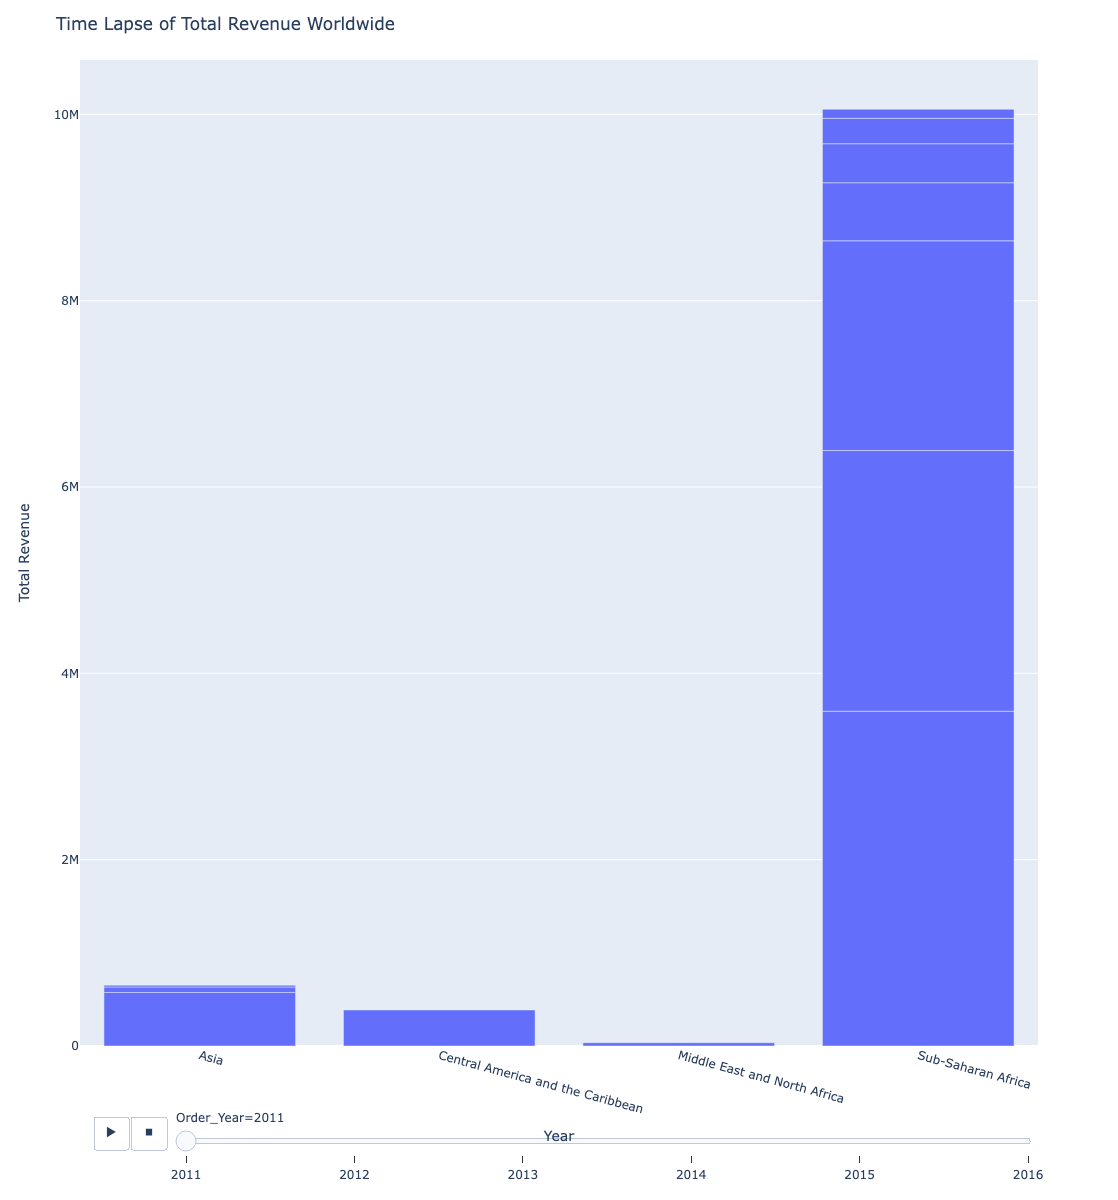

In [62]:
import plotly.express as px
unique_regions = sales_ad_table.Region.unique()
fig = px.bar(sales_ad_table,  
            x='Region', y = "Total Revenue",
            animation_frame="Order_Year",
            category_orders={'Region': unique_regions}, 
            width=800, height=1200,
            hover_name= "Region", 
            hover_data= ["Country", "Item Type","Total Revenue"])
fig.update_layout(
    title="Time Lapse of Total Revenue Worldwide",
    xaxis_title="Year",
    yaxis_title="Total Revenue", 
    xaxis_tickangle=15)

fig.show()



/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



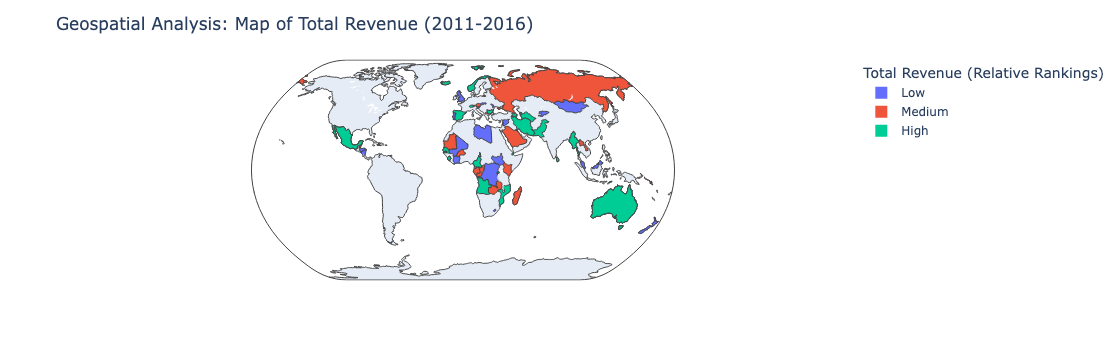

In [28]:
ad_geo = pd.merge(ad, geo, on='Country', how='left')

ad_geo['relative_total_revenue_rankings'] = pd.qcut(
    ad_geo['Total Revenue'],
    3,
    labels = ['Low', 'Medium', 'High'])

fig = px.choropleth(ad_geo, 
                    locations='Country', 
                    locationmode='country names', 
                    color='relative_total_revenue_rankings',
                    hover_name='Country',
                    projection='natural earth',
                                       labels={'relative_total_revenue_rankings': 'Total Revenue (Relative Rankings)'},
                     category_orders={'relative_total_revenue_rankings': ['Low', 'Medium', 'High']},  
) 

fig.update_layout(title='Geospatial Analysis: Map of Total Revenue (2011-2016)', 
                  geo_scope='world',
                  coloraxis_colorbar=dict(title="Total Revenue"))

fig.show()




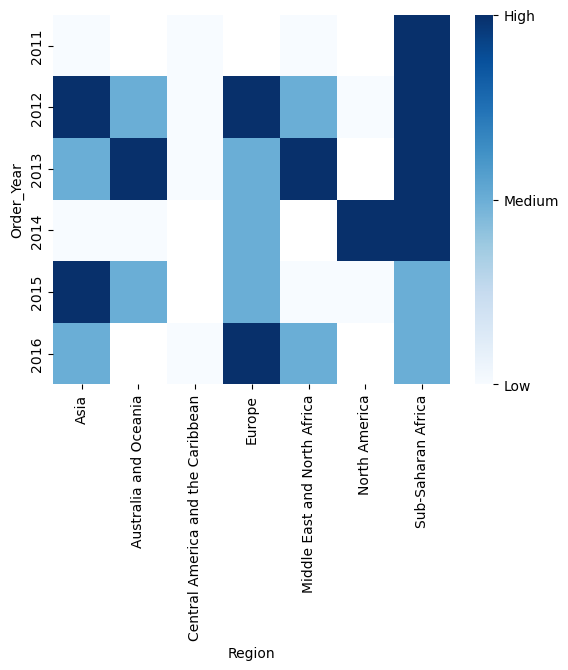

In [29]:
import seaborn as sns
ad_geo_year = ad_geo.groupby(['Order_Year','Region']).sum(numeric_only=True).reset_index()
ad_geo_year['relative_total_revenue_rankings'] = pd.qcut(
    ad_geo_year['Total Revenue'],
    3,
    labels = ['Low', 'Medium', 'High'])

ad_geo_year['relative_total_revenue_rankings'] = ad_geo_year['relative_total_revenue_rankings'].cat.codes

ad_geo_year = ad_geo_year.pivot(index='Order_Year', columns='Region', values='relative_total_revenue_rankings')


ax = sns.heatmap(ad_geo_year, cmap = 'Blues')
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0, 1, 2])
colorbar.set_ticklabels(['Low','Medium','High'])
plt.show() 


### Specific insights from the above analyses include: 
* Total Revenue appears to vary greatly over time across all regions.
* In 2015, Amazon was generated an relatively large amounts of revenue in Asia.
* Between 2011-2015, Sub-Saharan Africa generated the largest amount of revenue relative to other regions. 

### Total Units Sold
* We are interested in how many of each item type is sold across regions.
* We would also like to visualize how this distribution changes over time. 

In [30]:
units_sold = ad.groupby(['Region','Item Type'])['Units Sold'].sum().reset_index().pivot(index = 'Region', columns = 'Item Type', values = 'Units Sold').fillna(0)
units_sold

Item Type,Baby Food,Beverages,Cereal,Clothes,Cosmetics,Fruits,Household,Meat,Office Supplies,Personal Care,Snacks,Vegetables
Region,,,,,,,,,,,,
Asia,0.0,0.0,0.0,5930.0,6952.0,6267.0,8250.0,0.0,11718.0,4901.0,0.0,3856.0
Australia and Oceania,2974.0,18768.0,682.0,0.0,9654.0,7585.0,0.0,5908.0,2924.0,0.0,0.0,0.0
Central America and the Caribbean,0.0,8156.0,2804.0,5498.0,1705.0,0.0,0.0,0.0,0.0,0.0,2225.0,0.0
Europe,22087.0,9784.0,0.0,9515.0,20375.0,0.0,4795.0,0.0,5766.0,5070.0,0.0,171.0
Middle East and North Africa,0.0,0.0,4063.0,7884.0,16381.0,4979.0,0.0,0.0,2021.0,0.0,0.0,0.0
North America,0.0,0.0,0.0,0.0,0.0,0.0,6954.0,0.0,0.0,12189.0,0.0,0.0
Sub-Saharan Africa,5559.0,20000.0,9672.0,15880.0,11692.0,25345.0,11924.0,0.0,16251.0,16851.0,4085.0,16024.0


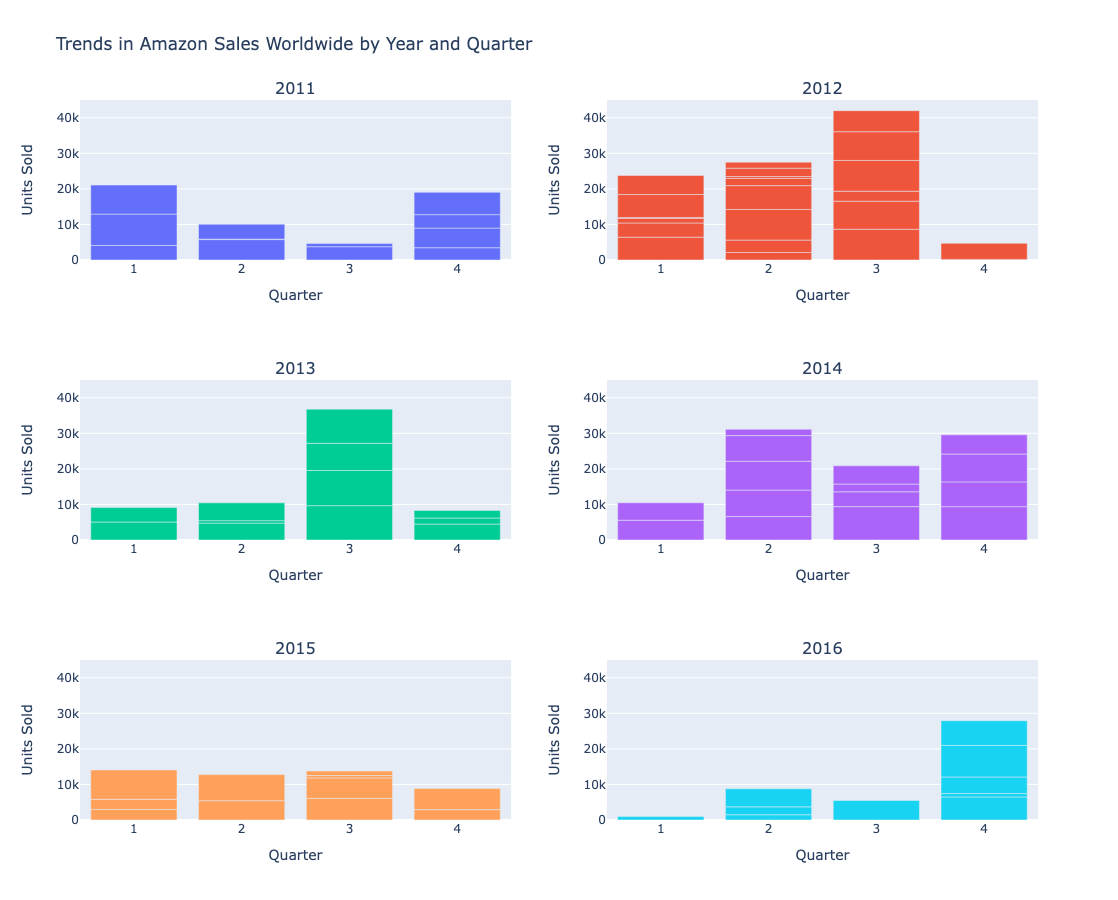

In [31]:

from plotly.subplots import make_subplots
import plotly.graph_objects as go

units_ad = pd.DataFrame(ad[(ad['Order Date'] >= '2011-01-01') & (ad['Order Date'] <= '2016-12-31')].sort_values(by = 'Order_Year'))
fig = make_subplots(rows=3, cols=2,
                   subplot_titles=("2011", "2012", "2013", "2014", "2015", "2016"))

for i, year in enumerate(units_ad['Order_Year'].unique()):
    current_year = units_ad[units_ad['Order_Year'] == year]
    row = i // 2 + 1  
    col = i % 2 + 1  
    hover_text = current_year.apply(lambda row: f""" Region: {row['Region']}<br> Item Type: {row['Item Type']}<br> Quarter: {row['Order_Quarter']}<br> Units Sold: {row['Units Sold']}""", axis=1)
    
    fig.add_trace(go.Bar(
        x=current_year['Order_Quarter'], 
        y=current_year['Units Sold'], 
        name=str(year),
        hovertext=hover_text,
        hoverinfo="text"  # Use the custom hover text
    ), row=row, col=col)
    fig.update_yaxes(range=[0,45000])
    fig.update_yaxes(title_text="Units Sold")
    fig.update_xaxes(title_text="Quarter")


fig.update_layout(
    title="Trends in Amazon Sales Worldwide by Year and Quarter",
    height=900,  
    width=1000, 
    showlegend = False
)
fig.show()




## To more clearly understand how sales have changed over time, let's visualize the patterns in Total Units Sold without breaking the Total Units Sold down by Item Type.

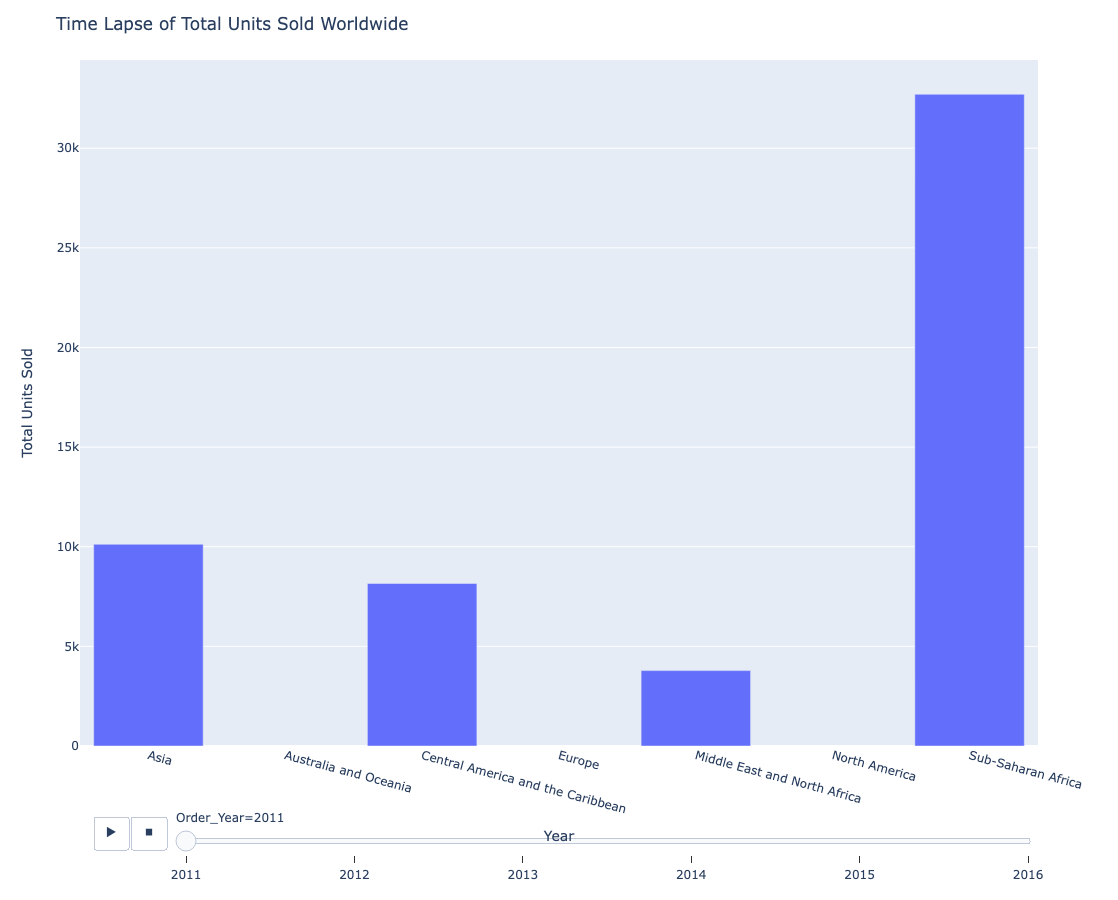

In [32]:
ad_sub = ad.groupby(['Region','Order_Year'])['Units Sold'].sum().reset_index().sort_values(by = ['Region','Order_Year'])
unique_regions = ad_sub.Region.unique()
fig = px.bar(ad_sub,  
            x='Region', y = "Units Sold",
            animation_frame="Order_Year",
            category_orders={'Region': unique_regions}, 
            width=900, height=900)
fig.update_layout(
    title="Time Lapse of Total Units Sold Worldwide",
    xaxis_title="Year",
    yaxis_title="Total Units Sold", 
    xaxis_tickangle=15)
fig.show()

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



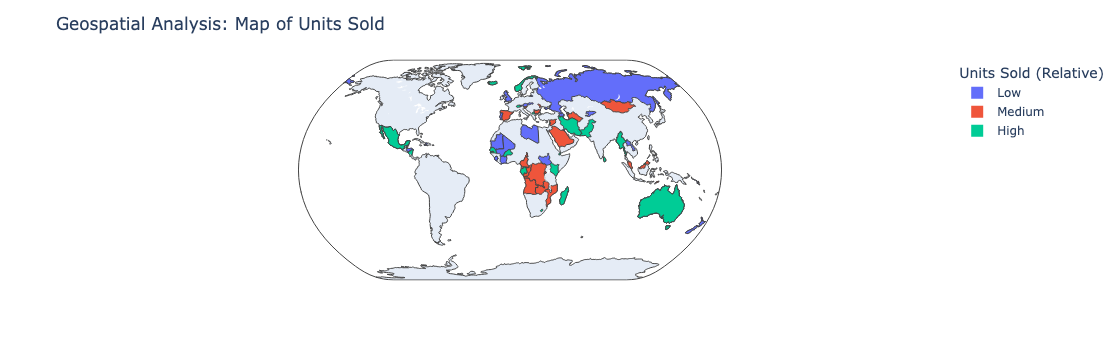

In [33]:

ad_geo = pd.merge(ad, geo, on='Country', how='left')

ad_geo['relative_units_sold_rankings'] = pd.qcut(
    ad_geo['Units Sold'],
    3,
    labels = ['Low', 'Medium', 'High'])



fig = px.choropleth(ad_geo, 
                    locations='Country', 
                    locationmode='country names', 
                    color='relative_units_sold_rankings',
                    hover_name='Country',
                    projection='natural earth',
                                       labels={'relative_units_sold_rankings':'Units Sold (Relative)'},
                                        category_orders={'relative_units_sold_rankings': ['Low', 'Medium', 'High']})

fig.update_layout(title='Geospatial Analysis: Map of Units Sold', geo_scope='world')
fig.show()

### Specific insights from the above analyses include: 
* In line with our findings related to Amazon's Total Revenue by Region over time, we find that Sub-Saharan Africa stands out as the region with an especially large amount of units sold from 2011-2016.
* Amazon appears to struggle in Central America and the Carribean. We suggest conducting further investigation into why Amazon does not appear to be successful in this region.

### Profit Margins
* We are also interested in how profitable Amazon is on average across all regions based on Sale Channel.

In [34]:
ad['Profit Margin'] = ((ad['Total Profit'] / ad['Total Cost'])*100)

ad_profits = ad.groupby(['Order_Year','Region','Sales Channel'])['Profit Margin'].mean().reset_index(name ='Avg. Profit Margin').round(2)
ad_profits


/var/folders/3f/t59vtj796q5bjl4slmbv42f40000gn/T/ipykernel_18192/51284636.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Order_Year,Region,Sales Channel,Avg. Profit Margin
0,2011,Asia,Offline,52.13
1,2011,Asia,Online,69.43
2,2011,Central America and the Caribbean,Offline,49.26
3,2011,Middle East and North Africa,Online,34.83
4,2011,Sub-Saharan Africa,Offline,35.43
5,2011,Sub-Saharan Africa,Online,83.70
6,2012,Asia,Online,24.05
7,2012,Australia and Oceania,Online,15.68
8,2012,Central America and the Caribbean,Online,75.65
9,2012,Europe,Offline,53.05


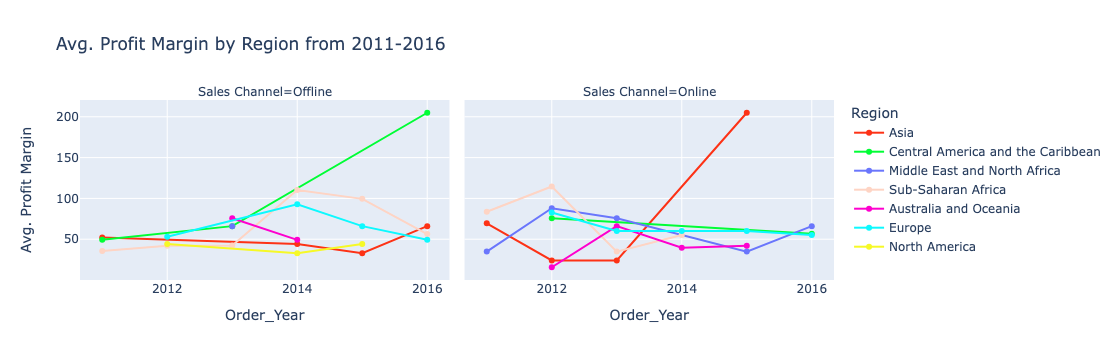

In [35]:
fig = px.line(ad_profits,
              x = 'Order_Year',
              y = "Avg. Profit Margin",
              title = 'Avg. Profit Margin by Region from 2011-2016',
              color = "Region",
              facet_col = 'Sales Channel',
              color_discrete_sequence=px.colors.qualitative.Light24,)
fig.update_traces(mode='markers+lines')
fig.show()

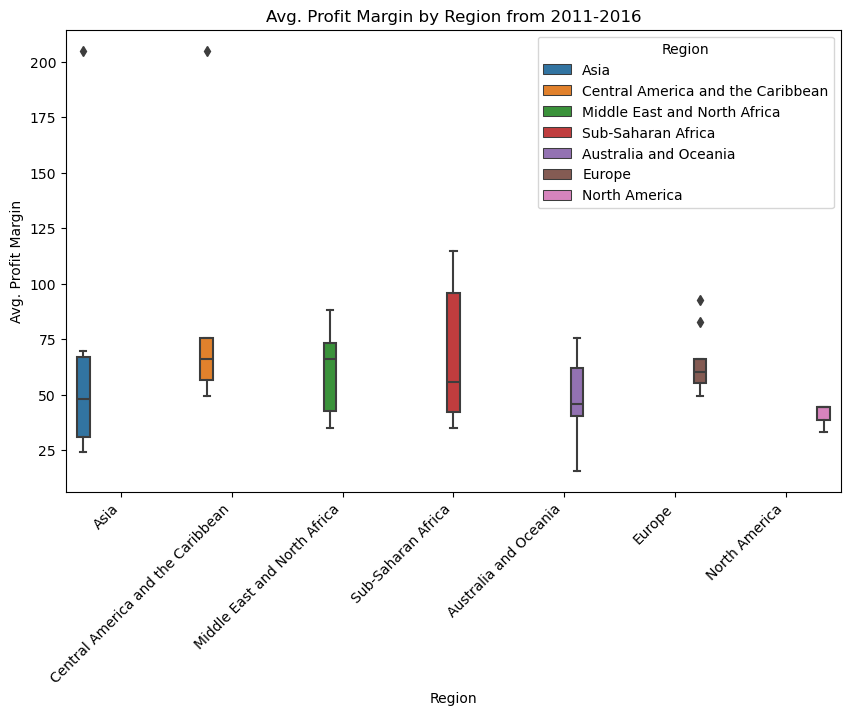

In [36]:
import seaborn as sns 
plt.figure(figsize=(10, 6))
g = sns.boxplot(data= ad_profits, 
            x='Region',
            y='Avg. Profit Margin', 
            hue= 'Region')

g.set_title('Avg. Profit Margin by Region from 2011-2016')
plt.xticks(rotation = 45, horizontalalignment='right')
plt.show()

In [38]:
ad['Profit Margin'] = ((ad['Total Profit'] / ad['Total Cost'])*100)

ad_profits = ad.groupby(['Order_Year','Country','Region','Sales Channel'])['Profit Margin'].mean().reset_index(name ='Avg. Profit Margin').round(2)

ad_geo = pd.merge(ad_profits, geo, on='Country', how='left')
ad_geo.head()

/var/folders/3f/t59vtj796q5bjl4slmbv42f40000gn/T/ipykernel_18192/2498928638.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Order_Year,Country,Region,Sales Channel,Avg. Profit Margin,country_code,latitude,longitude,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,2011,Angola,Sub-Saharan Africa,Offline,32.98,AO,-11.202692,17.873887,DE,38.910832,-75.527670,Delaware
1,2011,Cameroon,Sub-Saharan Africa,Online,24.05,CM,7.369722,12.354722,TX,31.968599,-99.901813,Texas
2,2011,Democratic Republic of the Congo,Sub-Saharan Africa,Online,49.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011,Kyrgyzstan,Asia,Online,69.43,KG,41.204380,74.766098,NaN,NaN,NaN,NaN
4,2011,Laos,Asia,Offline,69.43,LA,19.856270,102.495496,NaN,NaN,NaN,NaN


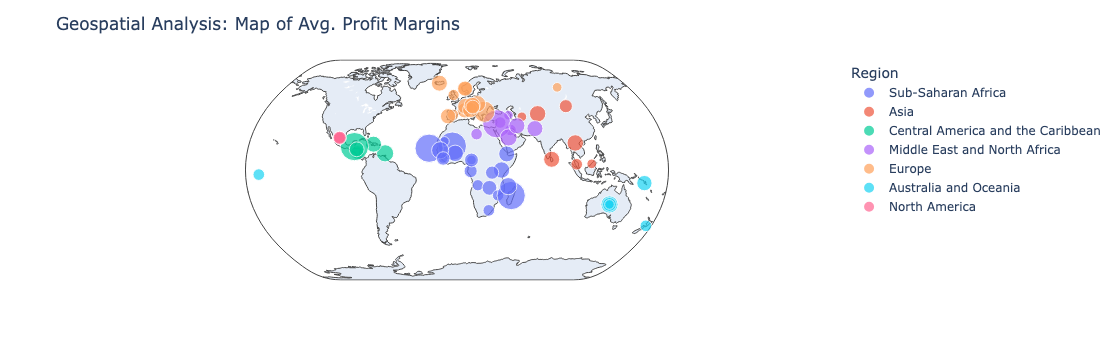

In [39]:
fig = px.scatter_geo(ad_geo, lat='latitude', lon='longitude', 
                     hover_name='Country', 
                     size='Avg. Profit Margin',
                     color = 'Region',# Optional: if you want to size points by some metric
                     projection="natural earth")

fig.update_layout(title='Geospatial Analysis: Map of Avg. Profit Margins', geo_scope='world')
fig.show()

In [50]:
ad_geo_year = ad_geo.groupby(['Order_Year','Region']).sum(numeric_only=True).reset_index()
ad_geo_year['relative_avg_profit_margin_rankings'] = pd.qcut(
    ad_geo_year['Avg. Profit Margin'],
    3,
    labels = ['Low', 'Medium', 'High'])


In [51]:
ad_geo_year['relative_avg_profit_margin_rankings'] = ad_geo_year['relative_avg_profit_margin_rankings'].cat.codes
ad_geo_year.head()

,Order_Year,Region,Avg. Profit Margin,latitude,longitude,usa_state_latitude,usa_state_longitude,relative_avg_profit_margin_rankings
0,2011,Asia,173.69,65.271134,279.237360,0.000000,0.000000,2
1,2011,Central America and the Caribbean,49.26,12.865416,-85.207229,0.000000,0.000000,0
2,2011,Middle East and North Africa,34.83,34.802075,38.996815,0.000000,0.000000,0
3,2011,Sub-Saharan Africa,441.10,9.064380,42.301886,70.879431,-175.429483,2
4,2012,Asia,24.05,4.535277,114.727669,46.879682,-110.362566,0


In [53]:

ad_geo_year = ad_geo_year.pivot(index='Order_Year', columns='Region', values='relative_avg_profit_margin_rankings')
ad_geo_year

Region,Asia,Australia and Oceania,Central America and the Caribbean,Europe,Middle East and North Africa,North America,Sub-Saharan Africa
Order_Year,,,,,,,
2011,2.0,NaN,0.0,NaN,0.0,NaN,2.0
2012,0.0,0.0,1.0,2.0,2.0,0.0,2.0
2013,0.0,1.0,1.0,0.0,1.0,NaN,1.0
2014,0.0,2.0,NaN,2.0,NaN,0.0,2.0
2015,2.0,1.0,NaN,1.0,0.0,0.0,2.0
2016,1.0,NaN,2.0,1.0,1.0,NaN,1.0


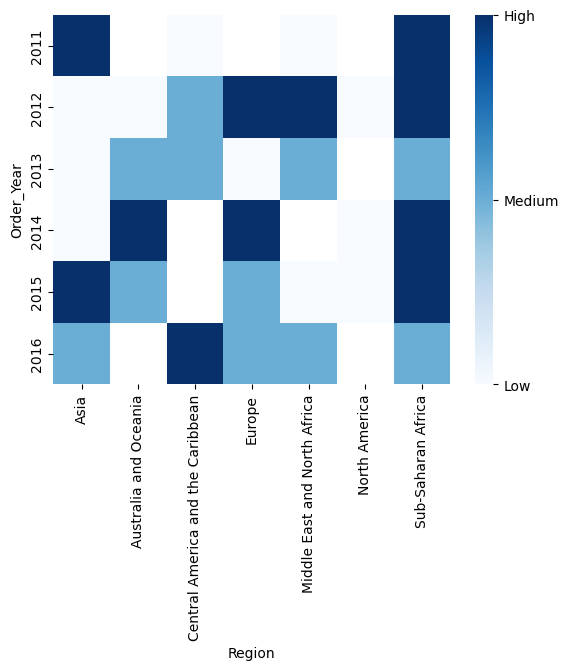

In [54]:
ax = sns.heatmap(ad_geo_year, cmap = 'Blues')
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0, 1, 2])
colorbar.set_ticklabels(['Low','Medium','High'])
plt.show()

### Specific insights from the above analyses include: 
* Based on the above visualization, Amazon is on average, a highly profitable organization.
* Sub-Saharan Africa has been significantly more profitable than other regions across the 2011-2016 period. 
* Offline Sales Channels:
    * Central America and the Carribean are experiencing unusually large positive profits.
    * The Sub-Saharan African and European regions are experiencing a downwards trend in average profit margins. 
* Online Sales Channels:
    * Asia is experiencing unusually large positive profits.
    * Other regions including Central America and the Carribean, Middle East and North Africa, Sub-Saharan Africa, and Europe are occupy relatively similar profit margins. 


## Profit Prediction:
* I would like to create a model to predict total profit based on features like units sold, unit price, and unit cost.
* The above analyses have also led to me believe Region may also be useful as predictors of Total Profit.

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split


In [57]:
predictors = ['Units Sold', 'Unit Price', 'Unit Cost', 'Order Priority', 'Region']
X = ad[predictors] 
y = ad['Total Profit'] 

## Because we are interested to see how Region and Country predict Total Profit, we will have to transform them into numerical data. 
X = pd.get_dummies(X, drop_first=True)

## Split our data into training and testing. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## I will use a Random Forest Model to capture nonlinear relationships. 
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

## Make predictions. 
y_pred = rf_model.predict(X_test)

## Evaluate model's performance. 
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

avg = ad['Total Profit'].mean() 

mae_percent = round(mae/avg * 100)
print(f"Percent error: {mae_percent}%")


Mean Absolute Error: 57726.0242529413
Root Mean Squared Error: 73781.95095786836
Percent error: 14%


In [58]:
## Now, we can evaluate how influential each feature was in predicting the Total Profit. 
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
importance_df[importance_df["Importance"]>=.10] 


,Feature,Importance
0,Units Sold,0.484955
1,Unit Price,0.327495
2,Unit Cost,0.162852


### Specific insights from the above analysis include:
* Units Sold, Unit Price, and Unit Cost are all significant predictors of Total Profit.
* Region does not appear to be a significant predictor of Total Profit. This may be due to a lack of data. 